# **4. Analyze**

---

## **4.1 Prerequisites**



**Import libraries**

In [33]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [34]:
df = pd.read_csv('clean_lichess_games.csv', encoding = 'utf-8')
df

,Unnamed: 0,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply,game_category,white level,black level,Rating_Diff,Quality,winner condition,base_time,increment_time
0,0,False,13,outoftime,white,bourgris,1500,a-00,1191,D10,Slav Defense,5,rapid,Beginner,Beginner,309,Medium Quality,higher rating,15,2
1,1,True,16,resign,black,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense,4,blitz,Beginner,Beginner,61,High Quality,lower rating,5,10
2,2,True,61,mate,white,ischia,1496,a-00,1500,C20,King's Pawn Game,3,blitz,Beginner,Beginner,4,High Quality,higher rating,5,10
3,3,True,61,mate,white,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game,3,rapid,Beginner,Beginner,15,High Quality,higher rating,20,0
4,4,True,95,mate,white,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5,rapid,Beginner,Beginner,54,High Quality,higher rating,30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19108,20053,True,24,resign,white,belcolt,1691,jamboger,1220,A80,Dutch Defense,2,rapid,Intermediate,Beginner,471,Low Quality,higher rating,10,10
19109,20054,True,82,mate,black,jamboger,1233,farrukhasomiddinov,1196,A41,Queen's Pawn,2,rapid,Beginner,Beginner,37,High Quality,lower rating,10,0
19110,20055,True,35,mate,white,jamboger,1219,schaaksmurf3,1286,D00,Queen's Pawn Game,3,rapid,Beginner,Beginner,67,High Quality,higher rating,10,0
19111,20056,True,109,resign,white,marcodisogno,1360,jamboger,1227,B07,Pirc Defense,4,rapid,Beginner,Beginner,133,High Quality,higher rating,10,0


## **4.2 Answer questions**

**Question 3: Is there a difference in the performance of players across different openings when analyzed by rating groups?**

Initially, we define performance as **number of win games / total games**

1. We get top 10 most popular **opening_names**
2. Grouping each white level

227


<Figure size 1200x600 with 0 Axes>

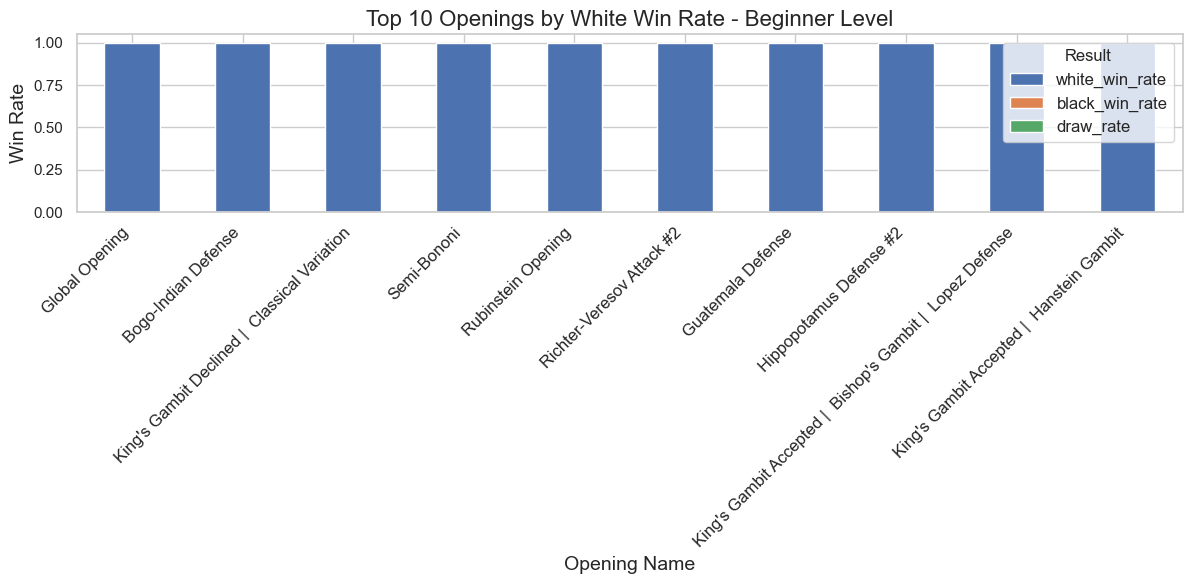

<Figure size 1200x600 with 0 Axes>

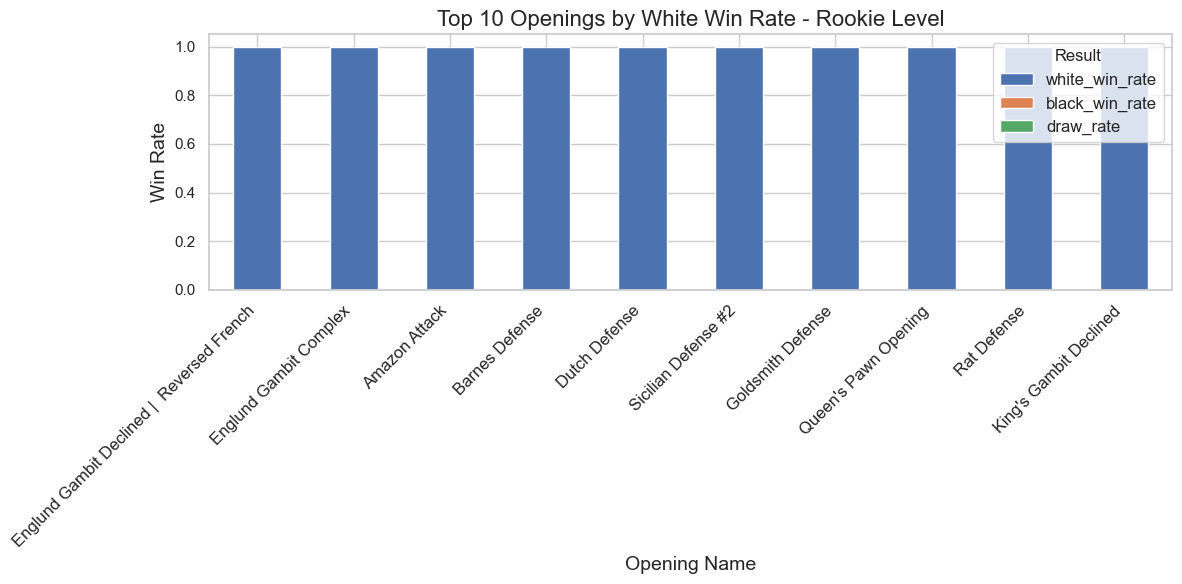

<Figure size 1200x600 with 0 Axes>

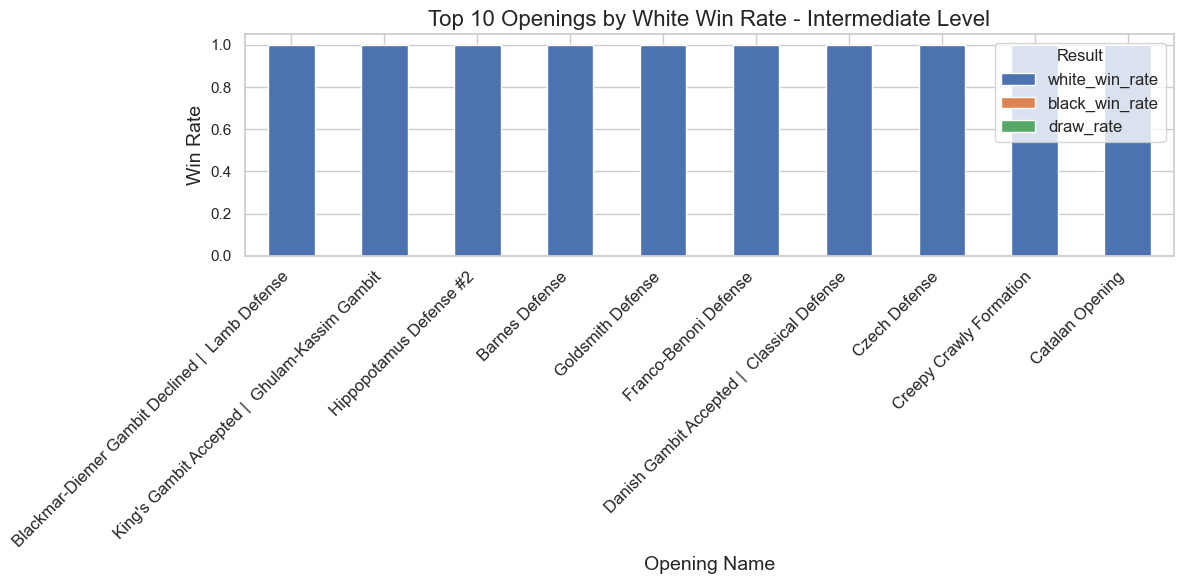

<Figure size 1200x600 with 0 Axes>

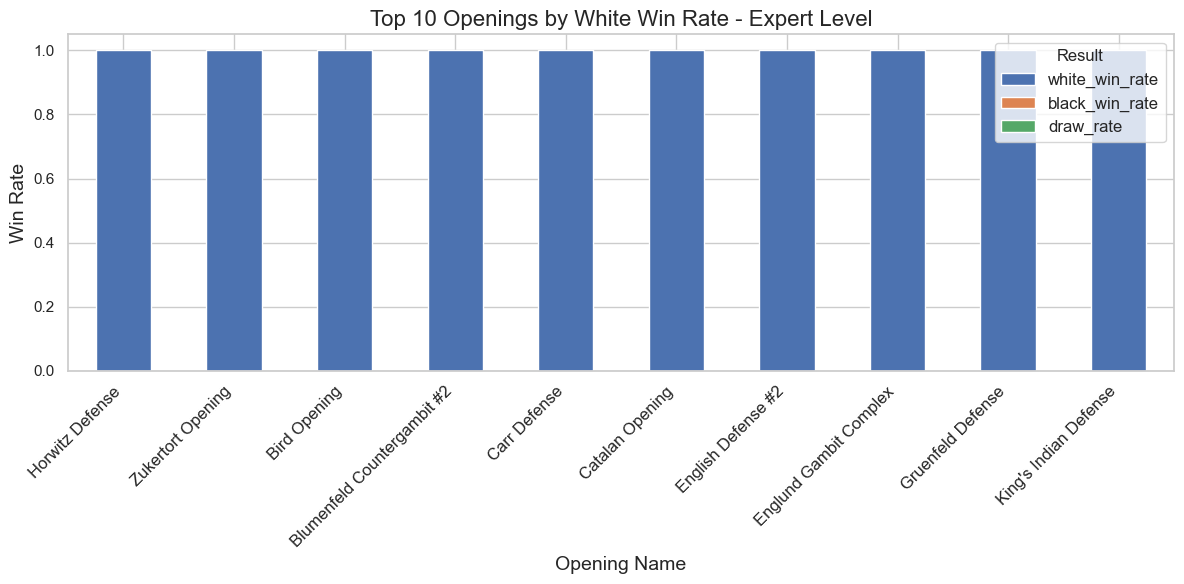

<Figure size 1200x600 with 0 Axes>

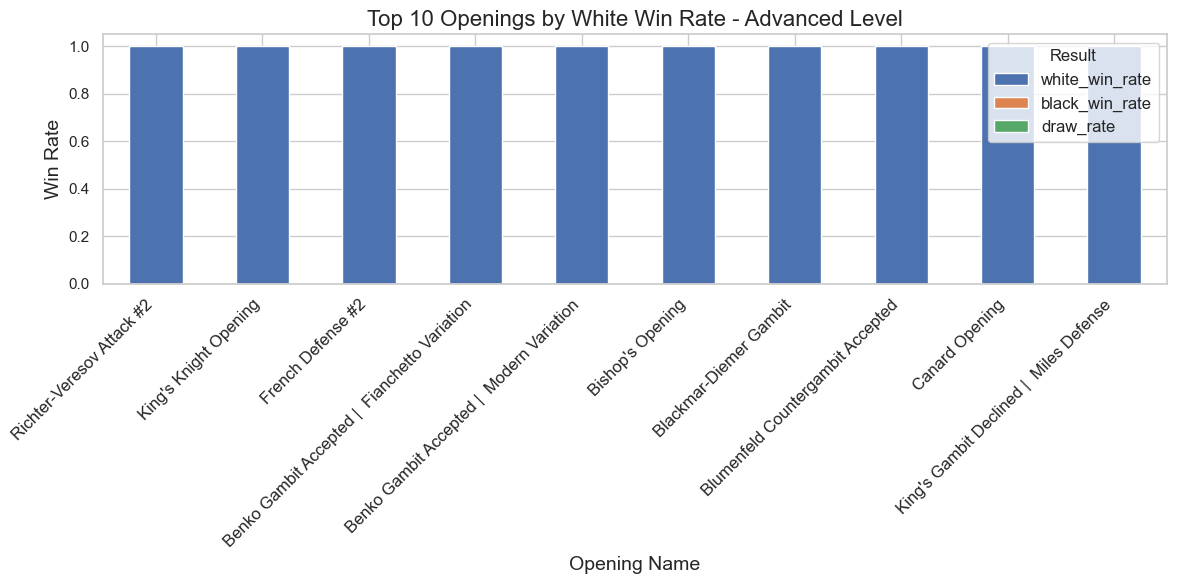

<Figure size 1200x600 with 0 Axes>

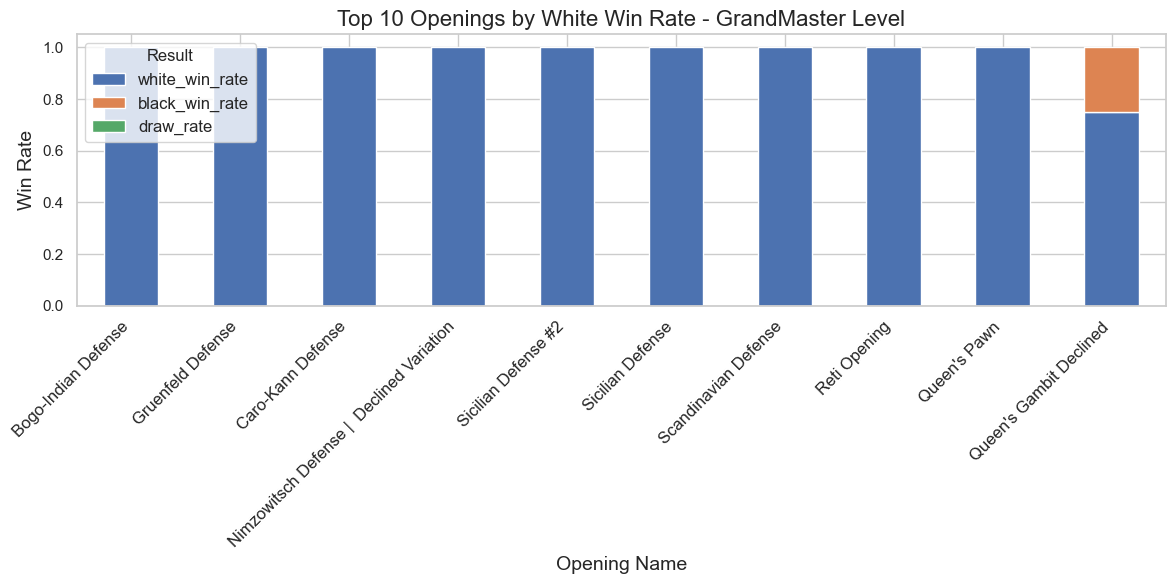

In [74]:
# white_levels = df['white level'].unique()
# opening_names = df['opening_name'].unique()
# print(opening_names.size)
# games_by_opening = df.groupby(['white level', 'opening_name', 'winner']).size().unstack().fillna(0).astype('int')

# games_by_opening['white_win_rate'] = games_by_opening['white'] / games_by_opening.sum(axis=1).astype('int')
# games_by_opening['black_win_rate'] = games_by_opening['black'] / games_by_opening.sum(axis=1).astype('int')
# games_by_opening['draw_rate'] = games_by_opening['draw'] / games_by_opening.sum(axis=1).astype('int')

# games_by_opening.sort_values(by='white_win_rate', ascending=False, inplace=True)

# for level in white_levels:
#     top_openings_by_level = (
#         games_by_opening.loc[level]
#         .sort_values(by='white_win_rate', ascending=False)
#         .head(10)
#     )
    
#     plt.figure(figsize=(12, 6))
#     top_openings_by_level[['white_win_rate', 'black_win_rate', 'draw_rate']].plot(
#         kind='bar', stacked=True, figsize=(12, 6)
#     )
    
#     plt.title(f"Top 10 Openings by White Win Rate - {level} Level", fontsize=16)
#     plt.xlabel("Opening Name", fontsize=14)
#     plt.ylabel("Win Rate", fontsize=14)
#     plt.xticks(rotation=45, ha='right', fontsize=12)
#     plt.legend(title="Result", fontsize=12)
#     plt.tight_layout()
    
#     plt.show()

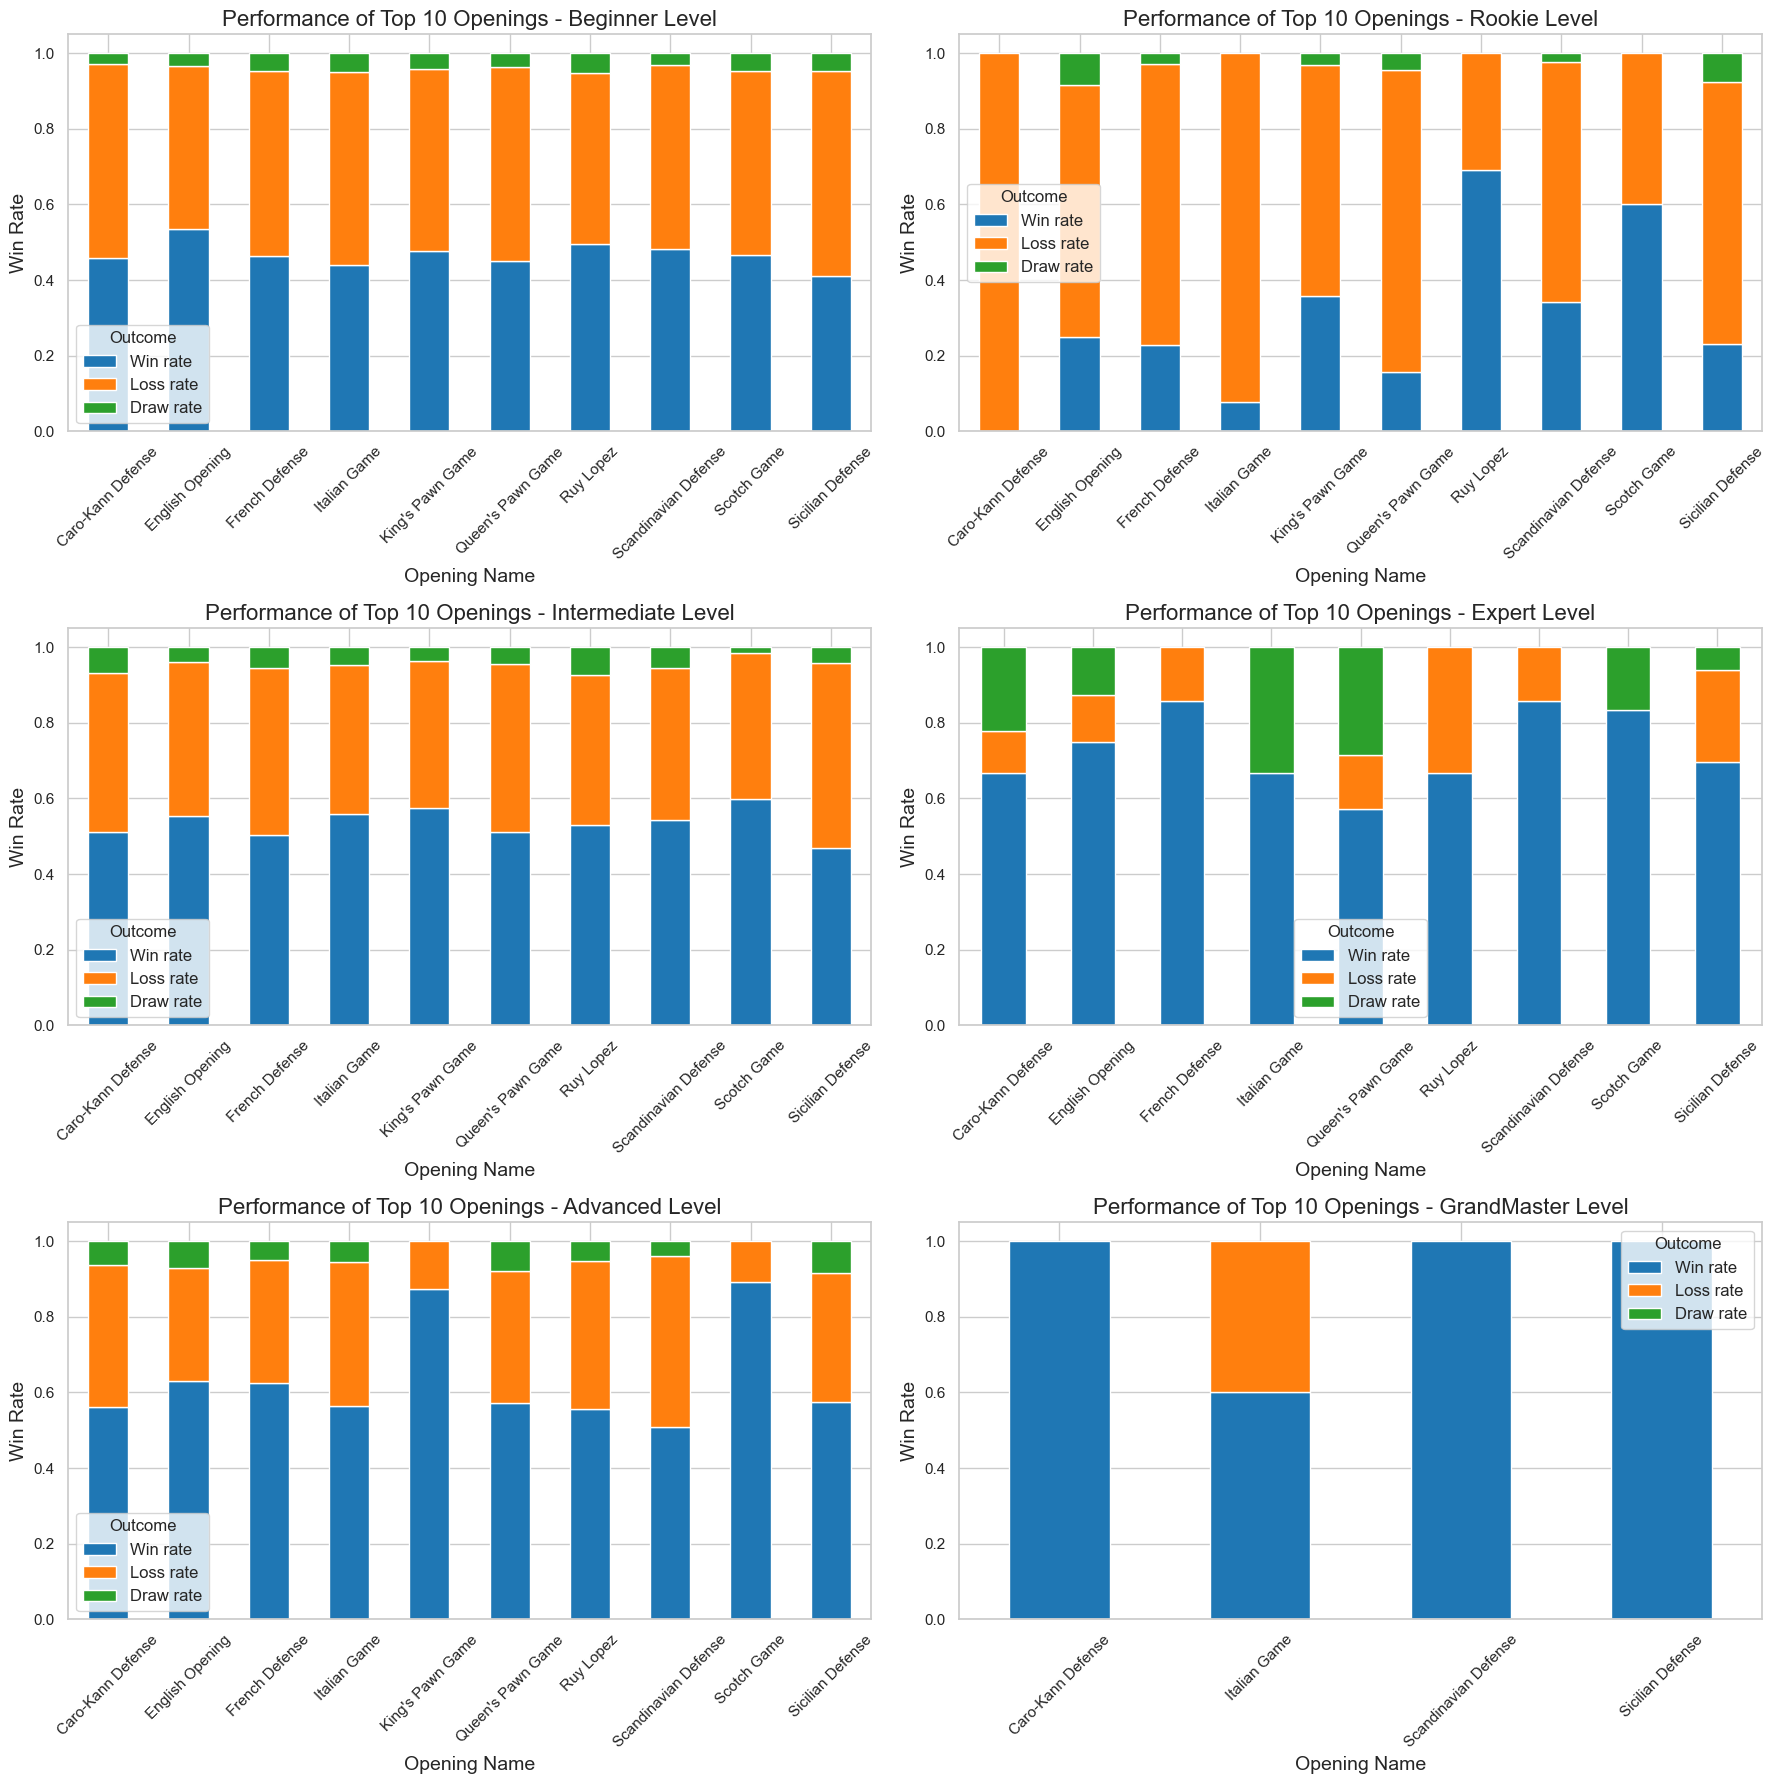

In [ ]:
top_openings = df['opening_name'].value_counts().head(10).index
white_levels = df['white level'].unique()

filtered_data = df[df['opening_name'].isin(top_openings)]


performance_by_level = (
    filtered_data.groupby(['white level', 'opening_name', 'winner'])
    .size()
    .unstack()
    .fillna(0)
    .astype('int')
)

performance_by_level['total_games'] = performance_by_level.sum(axis=1)
performance_by_level['white_win_rate'] = performance_by_level['white'] / performance_by_level['total_games']
performance_by_level['black_win_rate'] = performance_by_level['black'] / performance_by_level['total_games']
performance_by_level['draw_rate'] = performance_by_level['draw'] / performance_by_level['total_games']


fig, axes = plt.subplots(3, 2, figsize=(18, 6 * 3))

axes = axes.flatten()

for idx, level in enumerate(white_levels):
    level_data = performance_by_level.loc[level]
    
    # level_data_sorted = level_data.sort_values(by='white_win_rate', ascending=False)
    
    level_data[['white_win_rate', 'black_win_rate', 'draw_rate']].plot(
        kind='bar', 
        stacked=True, 
        color=['#1f77b4', '#ff7f0e', '#2ca02c'], 
        ax=axes[idx]
    )
    
    axes[idx].set_title(f'Performance of Top 10 Openings - {level} Level', fontsize=16)
    axes[idx].set_xlabel('Opening Name', fontsize=14)
    axes[idx].set_ylabel('Win Rate', fontsize=14)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(['Win rate', 'Loss rate', 'Draw rate'], title='Outcome', fontsize=12)

plt.tight_layout()
plt.show()


#### <span style='color:#2B9C15 '>📉 Phân tích dữ liệu để trả lời cho các câu hỏi </span>


Sắp xếp các khai cuộc theo white level và số lượng trận đấu (Games) theo thứ tự giảm dần, sau đó chọn 10 khai cuộc phổ biến nhất cho mỗi mức độ kinh nghiệm của người chơi cờ trắng.

In [36]:
sns.set(style="whitegrid")

g = sns.catplot(
    data=sorted_games,  
    x='Percentage of total games', 
    y='opening_name',  
    col='white level',  
    kind='bar', 
    palette='Blues_r', 
    height=6,  
    aspect=1.5,  
    col_wrap=2, 
    sharey=False  
)

g.set_titles("{col_name}")

g.set_axis_labels("Percentage of Total Games", "Opening Name")

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}")) 
    ax.set_xticks([i * 0.1 for i in range(0, 3)])  

    ax.set_xlim(0, 0.2)

plt.subplots_adjust(top=0.9)

g.fig.suptitle("Most Popular Openings by White Level", fontsize=16)

plt.show()

NameError: name 'sorted_games' is not defined

### **Nhận xét Tổng Quan**

- **Sicilian Defense**:  
  Phổ biến nhất ở mọi cấp độ, từ **Beginner** đến **GrandMaster**, cho thấy đây là khai cuộc mạnh và được ưa chuộng.  
  Lý do khiến khai cuộc này phổ biến ở mọi cấp độ là vì nó mang lại cơ hội thắng cao cho người cầm quân đen. Tuy nhiên, trong cờ vua, khi bạn nhận được lợi thế ở một mặt nào đó, bạn cũng phải chấp nhận rủi ro lớn hơn. Vì vậy, tỷ lệ thua cuộc khi sử dụng khai cuộc này cũng cao hơn.

- **Xu hướng khai cuộc với 1.e4**:  
  Một xu hướng rõ ràng từ dữ liệu của chúng ta là: **cấp độ càng cao, người chơi càng ít bắt đầu với nước 1.e4**.  
  - **1.e4** là nước đi được khuyến nghị cho người mới bắt đầu vì nó chiếm lĩnh trung tâm và mở đường cho cả quân hậu và quân tượng.  
  - Trong **Top 10 khai cuộc phổ biến** của người chơi cấp thấp, **8 khai cuộc bắt đầu với 1.e4** (ngoại lệ là **Queen’s Pawn Game** và **English Opening**).  
  - Ở cấp độ cao hơn, con số này giảm xuống còn **6** (thêm **Indian Game** và **Queen’s Gambit Declined** vào danh sách ngoại lệ).  
  - Ở cấp độ **GrandMaster**, con số này chỉ còn **5** (ngoại lệ mới bao gồm **Zukertort Opening** và **King’s Indian Defense**).

- **Cấp độ cao (GrandMaster, Expert)**:  
  Xu hướng sử dụng các khai cuộc phức tạp và chiến lược như **Italian Game**, **Caro-Kann Defense**, và **Queen's Gambit Declined**.

- **Cấp độ thấp (Rookie, Beginner)**:  
  Các khai cuộc đơn giản và cơ bản như **King's Pawn Game**, **Queen's Pawn Game**, và **Van't Kruijs Opening** được ưa chuộng.

---

### **Các khai cuộc không phổ biến ở cấp độ thấp**

Mặc dù các danh sách có nhiều điểm tương đồng, **khai cuộc phổ biến hơn ở các trận đấu cấp thấp**:


#### **King’s Pawn Game**

Như tên gọi, khai cuộc này liên quan đến việc di chuyển tốt Vua (tốt e2 cho quân trắng). Tuy nhiên, các trận đấu được xếp vào danh mục này là những trận có các nước đi khai cuộc **không phổ biến**.

Hầu hết các khai cuộc quen thuộc như **Sicilian Defense**, **Scandinavian Defense**, **Ruy Lopez**, và **Italian Game** cũng liên quan đến việc di chuyển tốt Vua, nhưng danh mục này chỉ bao gồm các nước đi tiếp theo **không thường gặp**.

Ví dụ về hai nước đi không phổ biến trong King’s Pawn Game:
- **Ví dụ 1**: 1.e4 e5 2.Qh5?!  
  Nước đi này khiến quân hậu dễ dàng bị tấn công bởi 2...Nc6 và tiếp theo là 3...Nf6. Nguyên tắc chung là nên phát triển các quân nhẹ trước khi đưa quân hậu vào cuộc chơi.

- **Ví dụ 2**: 1.e4 e5 2.d3?!  
  Nước đi này chặn đường phát triển của quân tượng trên f1 và quá bảo vệ ô e4, trong khi ô này không thực sự bị đe dọa. Trắng có thể làm tốt hơn bằng cách phát triển quân mã hoặc quân tượng.


### **Nhận xét**  
- Khi cấp độ tăng lên, các khai cuộc trở nên **phức tạp hơn** và được lựa chọn một cách chiến lược.  
- Ví dụ: **Sicilian Defense**, **Caro-Kann Defense**, và **Queen's Gambit Declined** thường xuất hiện ở các cấp độ cao.  
- Ngược lại, các khai cuộc đơn giản hơn như **King's Pawn Game** và **Philidor Defense** thường phổ biến ở cấp độ thấp do tính dễ học và ít lý thuyết.



## Question 5: What are the best openings for white and black?


#### <span style='color:#2B9C15 '>🛠 Tiền xử lý </span>


1. Nhóm dữ liệu theo winner condition và opening_name, tính số lượng trận đấu.
2. Tính tổng số trận đấu cho mỗi khai cuộc và tỷ lệ phần trăm trận đấu cho từng khai cuộc.
3. Lọc các khai cuộc có tổng số trận đấu > 50.

In [ ]:
res_by_opening = clean_df.groupby(['winner condition', 'opening_name'], as_index=False).size()
res_by_opening.rename(columns={'size': 'Games'}, inplace=True)

res_by_opening['Total_games'] = res_by_opening.groupby('opening_name')['Games'].transform('sum')

res_by_opening['Games percent'] = res_by_opening['Games'] / res_by_opening['Total_games']

res_by_opening = res_by_opening[res_by_opening['Total_games'] > 50]

best_for_white = res_by_opening[res_by_opening['winner condition'] == 'higher rating'].nlargest(10, 'Games percent')
best_for_black = res_by_opening[res_by_opening['winner condition'] == 'lower rating'].nlargest(10, 'Games percent')

#### <span style='color:#2B9C15 '>📉 Phân tích dữ liệu để trả lời cho các câu hỏi </span>


1. Chọn Top 10 khai cuộc cho White và Black:

- Lọc các khai cuộc có tỷ lệ thắng cao nhất cho người chơi trắng (higher rating) và đen (lower rating) từ dữ liệu đã lọc.
2. Vẽ biểu đồ:

- Sử dụng hàm openings_plot để vẽ biểu đồ thanh cho các khai cuộc có tỷ lệ thắng cao nhất cho người chơi trắng và đen, phân biệt bằng màu sắc: Màu "grey" cho trắng thắng, "black" cho đen thắng.

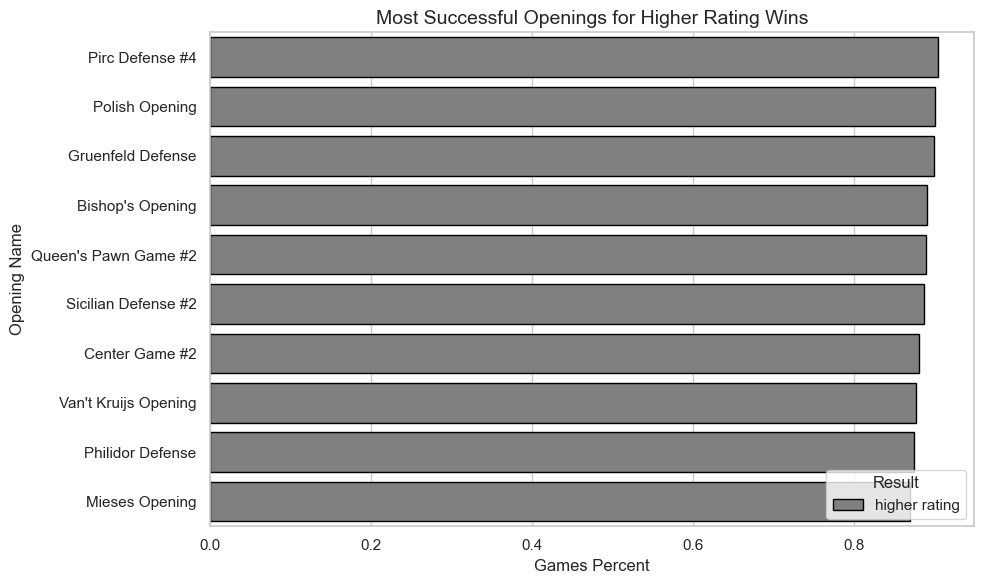

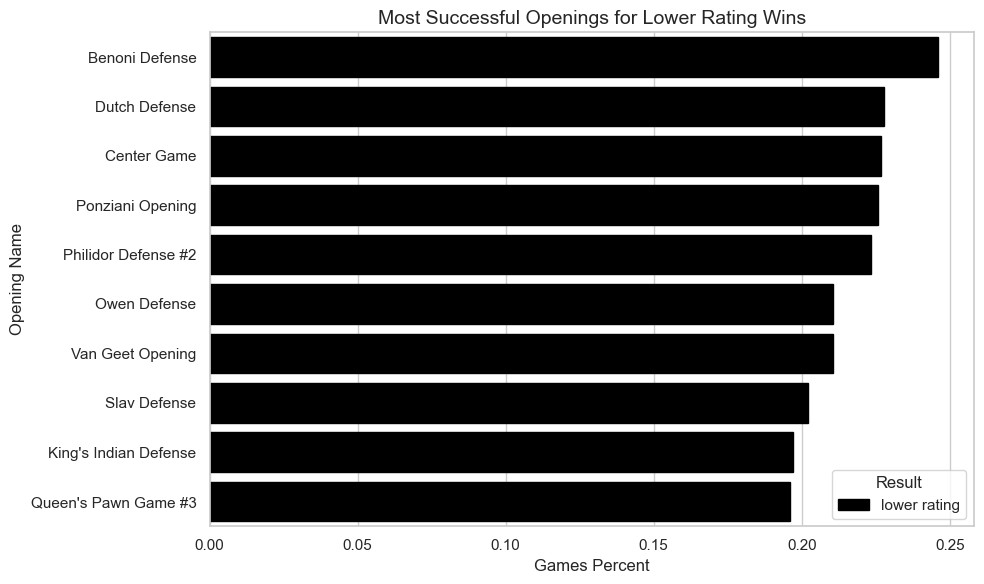

In [ ]:
def openings_plot(dataset, title, color_map):
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=dataset,
        x='Games percent',
        y='opening_name',
        hue='winner condition',
        dodge=False,
        palette=color_map,
        edgecolor="black"
    )
    plt.title(title, fontsize=14)
    plt.xlabel("Games Percent")
    plt.ylabel("Opening Name")
    plt.legend(title="Result", loc="lower right")
    plt.tight_layout()
    plt.show()

color_map = {"higher rating": "grey", "lower rating": "black", "draw": "grey"}

openings_plot(best_for_white, "Most Successful Openings for Higher Rating Wins", color_map)

openings_plot(best_for_black, "Most Successful Openings for Lower Rating Wins", color_map)

## Question 7: Which openings are common when a player wins due to resignation?

#### <span style='color:#2B9C15 '>🛠 Tiền xử lý </span>

- Trích xuất các trận đấu có điều kiện chiến thắng là từ bỏ (victory_status == 'resign').
- Nhóm theo tên khai cuộc và đếm số trận thắng bằng từ bỏ.
- Sắp xếp và chọn ra 10 khai cuộc có số trận thắng từ bỏ nhiều nhất.

In [ ]:
resign_games = clean_df[clean_df['victory_status'] == 'resign']

resign_by_opening = resign_games.groupby('opening_name', as_index=False).size()
resign_by_opening.rename(columns={'size': 'Resign Wins'}, inplace=True)

top_resign_openings = resign_by_opening.nlargest(10, 'Resign Wins')

#### <span style='color:#2B9C15 '>📉 Phân tích dữ liệu để trả lời cho các câu hỏi </span>


- Use a horizontal bar chart to visualize the top 10 openings leading to wins by resignation.

- Sử dụng biểu đồ cột nằm ngang để trực quan hóa top 10 khai cuộc có khả năng dẫn đến chiến thắng bằng cách đầu hàng

C:\Users\ACER\AppData\Local\Temp\ipykernel_13516\361677644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


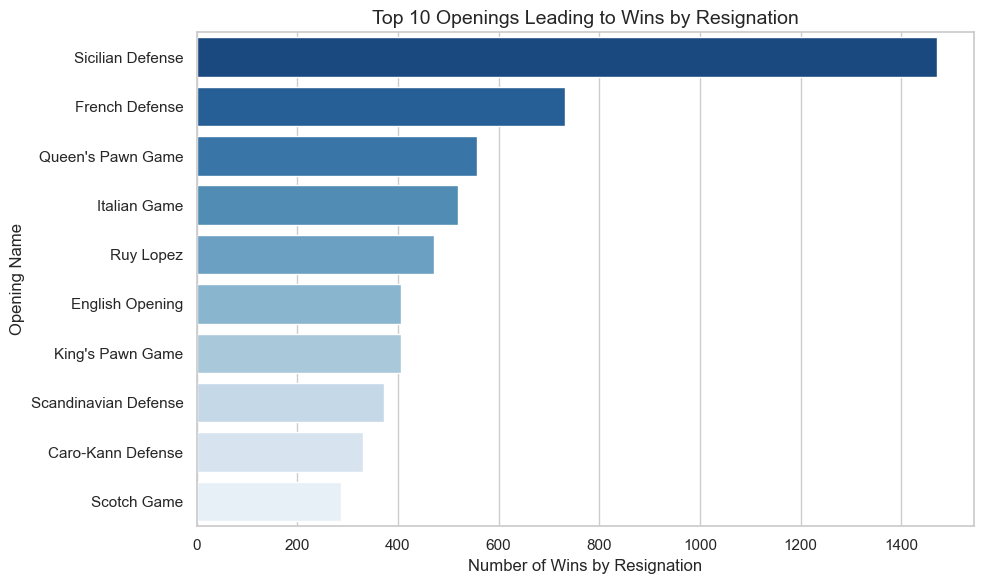

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_resign_openings,
    x='Resign Wins',
    y='opening_name',
    palette='Blues_r'
)

plt.title("Top 10 Openings Leading to Wins by Resignation", fontsize=14)
plt.xlabel("Number of Wins by Resignation", fontsize=12)
plt.ylabel("Opening Name", fontsize=12)

plt.tight_layout()
plt.show()

## Question 8:  Which first moves provide an advantage for each player?

#### <span style='color:#2B9C15 '>🛠 Tiền xử lý </span>

- Nhóm dữ liệu theo mã khai cuộc (opening_eco) và kết quả trận đấu (winner), tính số lượng trận đấu cho mỗi kết hợp.

- Tính tổng số trận đấu cho mỗi khai cuộc và lưu vào cột total_games.

- Lọc lấy Top 20 khai cuộc phổ biến nhất dựa trên tổng số trận đấu.

- Tính tỷ lệ phần trăm số trận thắng cho mỗi bên (Trắng hoặc Đen) trong các khai cuộc phổ biến.

- Dữ liệu được pivot lại để có dạng bảng với opening_eco là chỉ mục và các kết quả (winner) là các cột, chứa tỷ lệ phần trăm thắng.


In [ ]:
chess_summary = (
    clean_df.groupby(['opening_eco', 'winner'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

chess_summary['total_games'] = chess_summary.groupby('opening_eco')['count'].transform('sum')

top_10_openings = chess_summary.groupby('opening_eco')['total_games'].max().nlargest(20).index
filtered_chess_summary = chess_summary[chess_summary['opening_eco'].isin(top_10_openings)]

filtered_chess_summary['percent'] = filtered_chess_summary.groupby('opening_eco')['count'].transform(lambda x: x / x.sum())

pivot_data = filtered_chess_summary.pivot(index='opening_eco', columns='winner', values='percent').fillna(0)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13516\615184035.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_chess_summary['percent'] = filtered_chess_summary.groupby('opening_eco')['count'].transform(lambda x: x / x.sum())


#### <span style='color:#2B9C15 '>📉 Phân tích dữ liệu để trả lời cho các câu hỏi </span>


- Vẽ biểu đồ Stacked Bar Chart thể hiện tỷ lệ phần trăm chiến thắng của Trắng và Đen cho các khai cuộc phổ biến.
- Mỗi thanh biểu đồ thể hiện tỷ lệ phần trăm thắng cho Trắng và Đen trong một khai cuộc.
- Vẽ đường kẻ dọc để phân chia tỷ lệ thắng của Trắng và Đen.

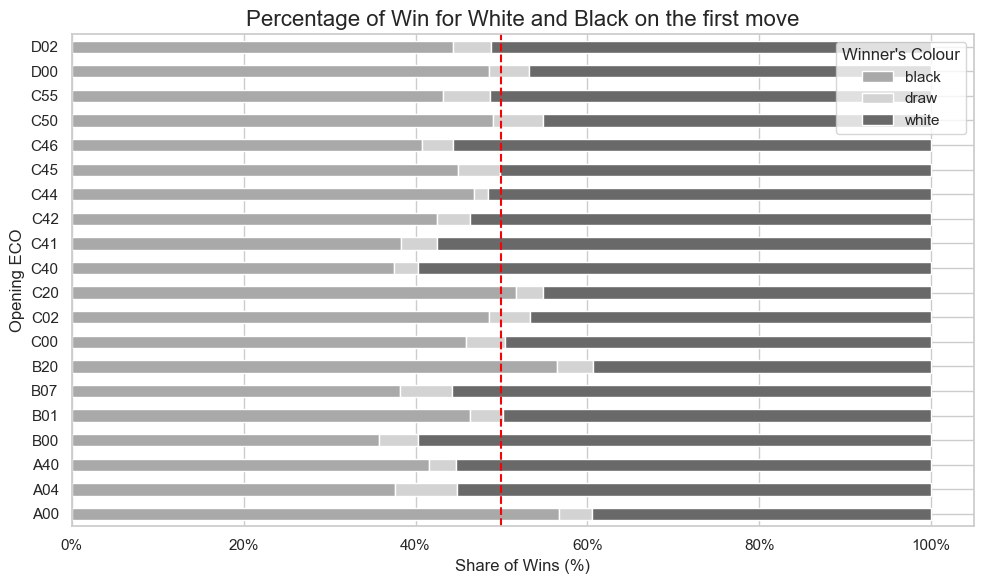

In [ ]:
pivot_data.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=['#a9a9a9', '#d3d3d3', '#696969']  
)
plt.axvline(0.5, color='red', linestyle='dashed', linewidth=1.5)
plt.title("Percentage of Win for White and Black on the first move", fontsize=16)
plt.xlabel("Share of Wins (%)", fontsize=12)
plt.ylabel("Opening ECO", fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))  
plt.legend(title="Winner's Colour")
plt.tight_layout()
plt.show()

## Question 9:  How does the rating difference affect the outcome of a game?

#### <span style='color:#2B9C15 '>🛠 Tiền xử lý </span>

- Sử dụng các khoảng giá trị của Rating_Diff để chia thành các nhóm rating (ví dụ: 0-50, 51-100, ...). Tạo cột Rating_Group để lưu nhóm rating cho mỗi trận đấu.

- Nhóm dữ liệu theo Rating_Group và winner condition, sau đó tính số lượng trận đấu cho mỗi nhóm.

- Tính tổng số trận đấu trong mỗi nhóm rating để chuẩn hóa tỷ lệ phần trăm.

- Tính tỷ lệ phần trăm số trận thắng cho mỗi nhóm rating và kết quả (Trắng, Đen, Hòa).

- Chuyển dữ liệu thành dạng bảng (pivot table) để có Rating_Group là chỉ mục và các kết quả (winner condition) là các cột, chứa tỷ lệ phần trăm chiến thắng.

In [ ]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]  
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', 
          '251-300', '301-350', '351-400', '401-450', '>450']
clean_df['Rating_Group'] = pd.cut(clean_df['Rating_Diff'], bins=bins, labels=labels, right=False)

rating_summary = (
    clean_df.groupby(['Rating_Group', 'winner condition'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

rating_summary['total_games'] = rating_summary.groupby('Rating_Group')['count'].transform('sum')

rating_summary['percent'] = rating_summary['count'] / rating_summary['total_games']

pivot_data = rating_summary.pivot(index='Rating_Group', columns='winner condition', values='percent').fillna(0)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13516\3721445698.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby(['Rating_Group', 'winner condition'], as_index=False)
C:\Users\ACER\AppData\Local\Temp\ipykernel_13516\3721445698.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_summary['total_games'] = rating_summary.groupby('Rating_Group')['count'].transform('sum')


#### <span style='color:#2B9C15 '>📉 Phân tích dữ liệu để trả lời cho các câu hỏi </span>

- Vẽ biểu đồ Stacked Bar Chart thể hiện tỷ lệ phần trăm chiến thắng (trắng, đen, hòa) cho mỗi nhóm rating.

- Thêm các yếu tố như tiêu đề, nhãn trục, định dạng phần trăm cho trục Y, và thiết lập vị trí của legend để biểu đồ dễ hiểu hơn.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13516\828171807.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby(['Rating_Group', 'winner condition'], as_index=False)
C:\Users\ACER\AppData\Local\Temp\ipykernel_13516\828171807.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_summary['total_games'] = rating_summary.groupby('Rating_Group')['count'].transform('sum')


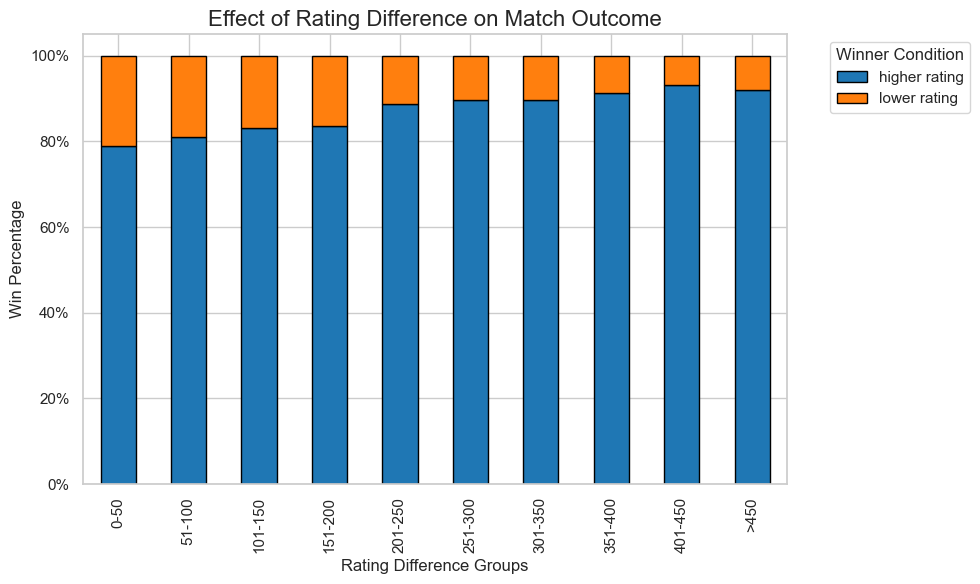

In [ ]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]  
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', 
          '251-300', '301-350', '351-400', '401-450', '>450']
clean_df['Rating_Group'] = pd.cut(clean_df['Rating_Diff'], bins=bins, labels=labels, right=False)

rating_summary = (
    clean_df.groupby(['Rating_Group', 'winner condition'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

rating_summary['total_games'] = rating_summary.groupby('Rating_Group')['count'].transform('sum')

rating_summary['percent'] = rating_summary['count'] / rating_summary['total_games']

pivot_data = rating_summary.pivot(index='Rating_Group', columns='winner condition', values='percent').fillna(0)

ax = pivot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e', '#2ca02c'], 
    edgecolor="black"
)

plt.title("Effect of Rating Difference on Match Outcome", fontsize=16)
plt.xlabel("Rating Difference Groups", fontsize=12)
plt.ylabel("Win Percentage", fontsize=12)
plt.legend(title="Winner Condition", bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0%}"))  
plt.tight_layout()

plt.show()

## Question 10: How does the base time affect the result of the game (win/loss/draw)?

#### <span style='color:#2B9C15 '>🛠 Tiền xử lý </span>

- Chọn các trận đấu có base_time nhỏ hơn 31 phút.

- Nhóm dữ liệu theo thời gian cơ bản (base_time) và kết quả trận đấu (winner), sau đó tính số lượng trận đấu cho mỗi nhóm.

- Tính tổng số trận đấu cho từng giá trị base_time và chuẩn hóa tỷ lệ phần trăm số trận thắng của mỗi kết quả (Trắng, Đen, Hòa).

- Pivot dữ liệu để có dạng bảng với base_time là chỉ mục và các kết quả (winner) là các cột, chứa tỷ lệ phần trăm chiến thắng.

In [ ]:
filtered_df = clean_df[clean_df['base_time'] < 31]


base_time_summary = (
    filtered_df.groupby(['base_time', 'winner'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

base_time_summary['total_games'] = base_time_summary.groupby('base_time')['count'].transform('sum')
base_time_summary['percent'] = base_time_summary['count'] / base_time_summary['total_games']

pivot_data = base_time_summary.pivot(index='base_time', columns='winner', values='percent').fillna(0)

#### <span style='color:#2B9C15 '>📉 Phân tích dữ liệu để trả lời cho các câu hỏi </span>

- Vẽ biểu đồ Stacked Bar Chart ngang thể hiện tỷ lệ phần trăm chiến thắng của mỗi kết quả (Trắng, Đen, Hòa) theo thời gian cơ bản (base_time).

- Thêm các yếu tố như tiêu đề, nhãn trục, định dạng phần trăm cho trục X, và kẻ đường dọc tại 50% để làm rõ sự phân chia giữa các kết quả.

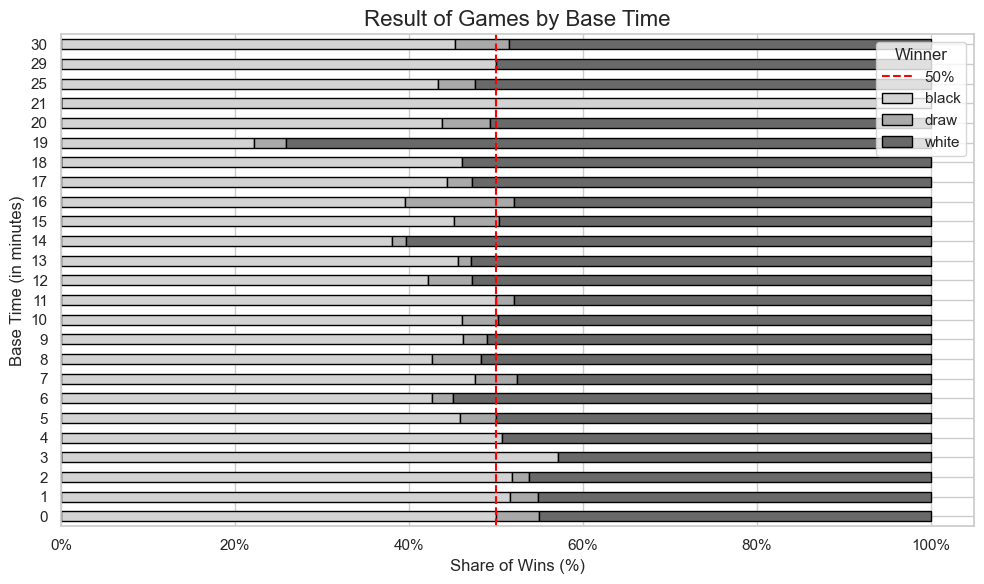

In [ ]:
ax = pivot_data.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=['#d3d3d3', '#a9a9a9', '#696969'],  
    edgecolor="black"
)

plt.axvline(0.5, color='red', linestyle='dashed', linewidth=1.5, label='50%')

plt.title("Result of Games by Base Time", fontsize=16)
plt.xlabel("Share of Wins (%)", fontsize=12)
plt.ylabel("Base Time (in minutes)", fontsize=12)
plt.legend(title="Winner")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))  
plt.tight_layout()

plt.show()